In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
car_data = pd.read_csv("C:\\Users\\suvarchala\\OneDrive\\Documents\\car data.csv")

In [3]:
print(car_data.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [4]:

print(car_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [5]:
print(car_data.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [6]:
car_data.dropna(inplace=True)


In [7]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


car_data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [11]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [12]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [13]:
Y_pred =lin_reg_model.predict(X_test)

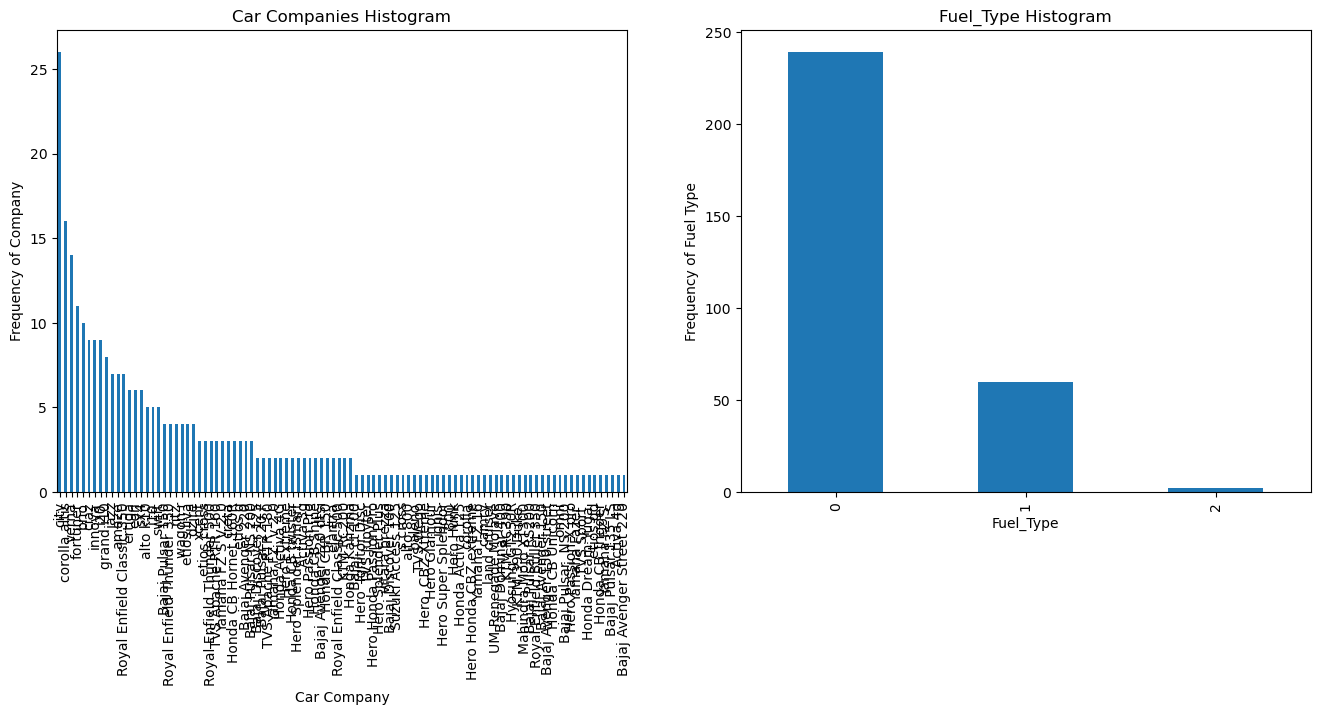

In [14]:


plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
plt1 = car_data['Car_Name'].value_counts().plot(kind='bar')
plt.title('Car Companies Histogram')
plt1.set_xlabel('Car Company')
plt1.set_ylabel('Frequency of Company')

plt.subplot(1, 3, 2)
plt2 = car_data['Fuel_Type'].value_counts().plot(kind='bar')
plt.title('Fuel_Type Histogram')
plt2.set_xlabel('Fuel_Type')
plt2.set_ylabel('Frequency of Fuel Type')

plt.show()


In [15]:
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.531579888968667


In [16]:
pred_car_data=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred,'Difference':Y_test-Y_pred})
pred_car_data

,Actual Value,Predicted Value,Difference
177,0.35,2.965630,-2.615630
289,10.11,8.300858,1.809142
228,4.95,6.057828,-1.107828
198,0.15,-1.467368,1.617368
60,6.95,9.257057,-2.307057
...,...,...,...
234,5.50,4.498772,1.001228
296,9.50,8.619307,0.880693
281,2.10,1.817546,0.282454
285,7.40,7.672588,-0.272588


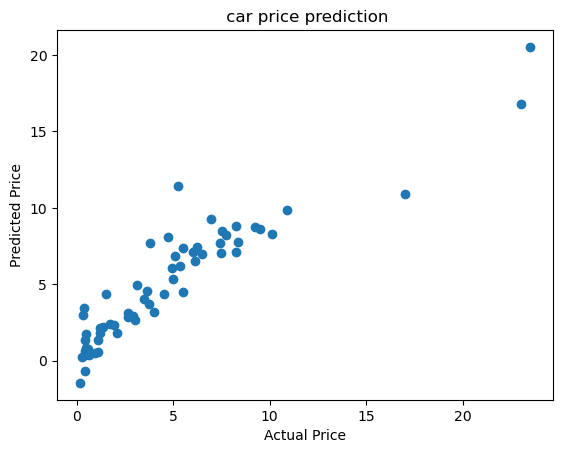

In [17]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" car price prediction")
plt.show()